# Week１　授業前課題１　Pythonをつかてみよう（紙を折る!）

この課題の目的

- 基礎的なプログラミング力を確認する!
- プログラミングを何らかしらの問題に対して適用してみる！
- 随時調査しながら進められるようにする!

**【問題1】べき乗の算術演算子を使用して作成**

In [11]:
"""
紙を43回折った時の厚さを計算するコード
"""
THICKNESS = 0.00008
n_folded = 43
folded_thickness = THICKNESS*(2**n_folded)
print("厚さ： {}メートル".format(folded_thickness))

厚さ： 703687441.77664メートル


**【問題2】単位の変換**

In [7]:
# メートルを万キロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}万キロメートル".format(folded_thickness/1000/10000))

厚さ： 70.37万キロメートル


月までの距離は38.44万キロメートル
⇒結論：**紙を43回折った時の厚さは月に届く**

**【問題3】for文を使用して作成**

In [31]:
#for文を使用したプログラム
THICKNESS = 0.00008

n_folded = 43

folded_thickness = THICKNESS
for i in range(n_folded):
    folded_thickness = folded_thickness*2
print("厚さ： {:.2f}万キロメートル".format(folded_thickness/10000000))

厚さ： 70.37万キロメートル


**【問題4】計算時間の比較**

In [35]:
#べき乗（43回）の計算時間
import time
start01 = time.time()
#####

THICKNESS = 0.00008

n_folded = 43

folded_thickness = THICKNESS*(2**n_folded)

#####
elapsed_time = time.time() - start01
print("time_べき_43 : {}[ms]".format(elapsed_time*1000))

time_べき_43 : 0.16427040100097656[ms]


In [36]:
#for分（43回）の計算時間
start02 = time.time()
#####

THICKNESS = 0.00008

n_folded = 43

folded_thickness = THICKNESS
for i in range(n_folded):
    folded_thickness = folded_thickness*2

#####
elapsed_time = time.time() - start02
print("time_for_43 : {}[ms]".format(elapsed_time*1000))

time_for_43 : 0.2181529998779297[ms]


《発展：繰り返し回数を増やす》

In [37]:
#べき乗（1000回）の計算時間
start03 = time.time()
#####

THICKNESS = 0.00008

n_folded = 1000

folded_thickness = THICKNESS*(2**n_folded)

#####
elapsed_time = time.time() - start03
print("time_べき_1000 : {}[ms]".format(elapsed_time*1000))

time_べき_1000 : 0.16999244689941406[ms]


In [39]:
#for分（1000回）の計算時間
start04 = time.time()
#####

THICKNESS = 0.00008

n_folded = 1000

folded_thickness = THICKNESS
for i in range(n_folded):
    folded_thickness = folded_thickness*2

#####
elapsed_time = time.time() - start04
print("time_for_1000 : {}[ms]".format(elapsed_time*1000))

time_for_1000 : 0.33783912658691406[ms]


《発展：マジックコマンドを使う》

In [24]:
%%timeit
THICKNESS = 0.00008
n_folded = 43
folded_thickness = THICKNESS*2**(n_folded)

588 ns ± 2.25 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [41]:
%%timeit
THICKNESS = 0.00008
n_folded = 1000
folded_thickness = THICKNESS
for i in range(n_folded):
    folded_thickness = folded_thickness*2

69.3 µs ± 246 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**結論：べき乗の算術演算子を使った計算速度がfor文を使用したプログラミングより速い。**

原因の推察：べき乗の算術演算子を使った計算は単純計算であり、計算が得意であるコンピューターにとっては負担とならないのに対し、for文を使用したプログラミングは40何回も繰り返さないといけないため、計算時間がよりかかる。

また、コードの長さもべき乗のほうが短くてわかりやすいため、こちらの書き方の方が良さそうだと感じました。


## 4.過程の可視化

**【問題5】リストへの保存**

In [48]:
# for文を使用したコードに、過程の値合計44個を記録するコードを追加
THICKNESS = 0.00008

n_folded = 43

folded_thickness_list = [THICKNESS]
for i in range(n_folded):
    folded_thickness_list.append(folded_thickness_list[-1]*2)
print("厚さ： {:.2f}万キロメートル".format(folded_thickness_list[-1]/10000000))
print(folded_thickness_list)
print("リスト要素の個数:",len(folded_thickness_list))

厚さ： 70.37万キロメートル
[8e-05, 0.00016, 0.00032, 0.00064, 0.00128, 0.00256, 0.00512, 0.01024, 0.02048, 0.04096, 0.08192, 0.16384, 0.32768, 0.65536, 1.31072, 2.62144, 5.24288, 10.48576, 20.97152, 41.94304, 83.88608, 167.77216, 335.54432, 671.08864, 1342.17728, 2684.35456, 5368.70912, 10737.41824, 21474.83648, 42949.67296, 85899.34592, 171798.69184, 343597.38368, 687194.76736, 1374389.53472, 2748779.06944, 5497558.13888, 10995116.27776, 21990232.55552, 43980465.11104, 87960930.22208, 175921860.44416, 351843720.88832, 703687441.77664]
リスト要素の個数: 44


**【問題6】折れ線グラフの表示**

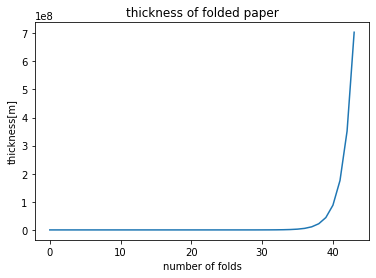

In [50]:
"""
グラフを表示する。タイトルと軸ラベル名付き。
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(folded_thickness_list) # 「リスト名」のところにリストの変数名を入れる
plt.show()

**グラフに対する考察：40回を超えたところから急激に厚さが増えた⇒指数関数の性質に合致する**

**【問題7】グラフのカスタマイズ**

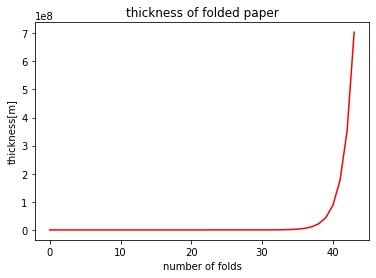

In [51]:
"""
赤い折れ線グラフを表示する。
"""
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(folded_thickness_list, color='red')
plt.show()

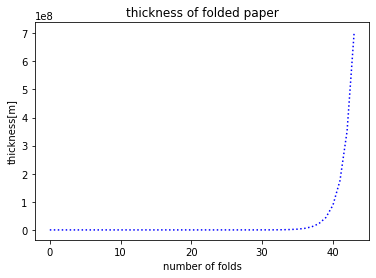

In [52]:
"""
青色の折れ線グラフを表示する。
"""
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(folded_thickness_list, color='blue' ,linestyle=':')
plt.show()

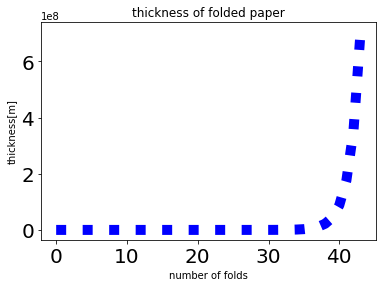

In [53]:
"""
青色の折れ線グラフ（点線）を表示する。
"""
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.tick_params(labelsize=20) # 軸の値に関する設定
plt.plot(folded_thickness_list, color='blue', linestyle=':', linewidth='10')
plt.show()